<a href="https://colab.research.google.com/github/rbarkerclarke/MaskMimicMaintain/blob/main/PlotDataMMM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.11.13


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm

import statistics as stat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from itertools import *
try:
    import itertools.izip as zip
except ImportError:
    import itertools

In [ ]:
df = pd.read_csv("./LiteraturePayoffMatrices-All.csv")
df_2 = pd.read_csv("./LiteraturePayoffMatrices-All.csv")

In [ ]:
df["paper"] = np.where(df['Paper']=='Faroukkian2020','Farrokhian2020',df['Paper'])
df["paper"] = np.where(df['Paper']=='Maltas2023','Maltas2024',df['Paper'])
df["paper"] = pd.Categorical(df["paper"])

In [ ]:
df

,Lab,Paper,Condition,A,B,C,D,Ap,Bp,Cp,...,S,s/1+s,a_wm,a_mw,awm_s,amw_s,System,mu,Include,paper
0,Scott,Kaznatcheev2019,DMSO+CAF,2.600000,3.500000,3.100000,3.000000,1.0,1.3462,1.1923,...,0.1538,0.13,0.3462,0.0385,2.250,0.250,Cancer,0.00001,Y,Kaznatcheev2019
1,Scott,Kaznatcheev2019,DMSO,2.500000,2.400000,4.000000,2.700000,1.0,0.9600,1.6000,...,0.0800,0.07,-0.0400,0.5200,-0.500,6.500,Cancer,0.00001,Y,Kaznatcheev2019
2,Scott,Kaznatcheev2019,Alectinib+CAF,0.500000,-0.400000,3.800000,2.400000,1.0,-0.8000,7.6000,...,3.8000,0.79,-1.8000,2.8000,-0.474,0.737,Cancer,0.00001,Y,Kaznatcheev2019
3,Scott,Kaznatcheev2019,Alectinib,2.300000,4.300000,-1.300000,-1.000000,1.0,1.8696,-0.5652,...,-1.4348,3.30,0.8696,-0.1304,-0.606,0.091,Cancer,0.00001,Y,Kaznatcheev2019
4,Scott,Maltas2023,PC9vEvolved,1.000000,0.970000,0.970000,0.840000,1.0,0.9700,0.9700,...,-0.1600,-0.19,-0.0300,0.1300,0.188,-0.813,Cancer,0.00001,Y,Maltas2024
5,Scott,Maltas2023,PC9vKRAS,1.030000,0.990000,1.010000,0.930000,1.0,0.9612,0.9806,...,-0.0971,-0.11,-0.0388,0.0777,0.400,-0.800,Cancer,0.00001,Y,Maltas2024
6,Scott,Maltas2023,PC9vPIK3CA,1.000000,1.020000,0.950000,0.880000,1.0,1.0200,0.9500,...,-0.1200,-0.14,0.0200,0.0700,-0.167,-0.583,Cancer,0.00001,Y,Maltas2024
7,Scott,Maltas2023,PC9vBRAF,1.010000,1.010000,0.980000,0.900000,1.0,1.0000,0.9703,...,-0.1089,-0.12,0.0000,0.0792,0.000,-0.727,Cancer,0.00001,Y,Maltas2024
8,Scott,Farrokhian2022,Parental v Res,0.996300,1.004000,0.975000,0.751700,1.0,1.0077,0.9786,...,-0.2455,-0.33,0.0077,0.2241,-0.031,-0.913,Cancer,0.00001,Y,Farrokhian2022
9,Scott,Farrokhian2022,PvR 0.25um,0.470000,0.420000,0.830000,0.700000,1.0,0.8936,1.7660,...,0.4894,0.33,-0.1064,0.2766,-0.217,0.565,Cancer,0.00001,Y,Farrokhian2022


In [ ]:
df = df.query('A.notnull()')
df = df.query('paper != "Freischel2021"')
df = df.query('paper != "Chao"')
df["S"] = [float(i) for i in df["S"]]
df["a_mw"] = [float(i) for i in df["a_mw"]]
df["a_wm"] = [float(i) for i in df["a_wm"]]
df["amw_s"] = [float(i) for i in df["amw_s"]]
df["awm_s"] = [float(i) for i in df["awm_s"]]

df["Ap"]= [float(i) for i in df["Ap"]]
df['Bp']= [float(i) for i in df["Bp"]]
df['Cp']= [float(i) for i in df["Cp"]]
df['Dp']= [float(i) for i in df["Dp"]]

df


,Lab,Paper,Condition,A,B,C,D,Ap,Bp,Cp,...,S,s/1+s,a_wm,a_mw,awm_s,amw_s,System,mu,Include,paper
0,Scott,Kaznatcheev2019,DMSO+CAF,2.6000,3.5000,3.10000,3.0000,1.0,1.3462,1.1923,...,0.1538,0.13,0.3462,0.0385,2.250,0.250,Cancer,0.00001,Y,Kaznatcheev2019
1,Scott,Kaznatcheev2019,DMSO,2.5000,2.4000,4.00000,2.7000,1.0,0.9600,1.6000,...,0.0800,0.07,-0.0400,0.5200,-0.500,6.500,Cancer,0.00001,Y,Kaznatcheev2019
2,Scott,Kaznatcheev2019,Alectinib+CAF,0.5000,-0.4000,3.80000,2.4000,1.0,-0.8000,7.6000,...,3.8000,0.79,-1.8000,2.8000,-0.474,0.737,Cancer,0.00001,Y,Kaznatcheev2019
3,Scott,Kaznatcheev2019,Alectinib,2.3000,4.3000,-1.30000,-1.0000,1.0,1.8696,-0.5652,...,-1.4348,3.30,0.8696,-0.1304,-0.606,0.091,Cancer,0.00001,Y,Kaznatcheev2019
4,Scott,Maltas2023,PC9vEvolved,1.0000,0.9700,0.97000,0.8400,1.0,0.9700,0.9700,...,-0.1600,-0.19,-0.0300,0.1300,0.188,-0.813,Cancer,0.00001,Y,Maltas2024
5,Scott,Maltas2023,PC9vKRAS,1.0300,0.9900,1.01000,0.9300,1.0,0.9612,0.9806,...,-0.0971,-0.11,-0.0388,0.0777,0.400,-0.800,Cancer,0.00001,Y,Maltas2024
6,Scott,Maltas2023,PC9vPIK3CA,1.0000,1.0200,0.95000,0.8800,1.0,1.0200,0.9500,...,-0.1200,-0.14,0.0200,0.0700,-0.167,-0.583,Cancer,0.00001,Y,Maltas2024
7,Scott,Maltas2023,PC9vBRAF,1.0100,1.0100,0.98000,0.9000,1.0,1.0000,0.9703,...,-0.1089,-0.12,0.0000,0.0792,0.000,-0.727,Cancer,0.00001,Y,Maltas2024
8,Scott,Farrokhian2022,Parental v Res,0.9963,1.0040,0.97500,0.7517,1.0,1.0077,0.9786,...,-0.2455,-0.33,0.0077,0.2241,-0.031,-0.913,Cancer,0.00001,Y,Farrokhian2022
9,Scott,Farrokhian2022,PvR 0.25um,0.4700,0.4200,0.83000,0.7000,1.0,0.8936,1.7660,...,0.4894,0.33,-0.1064,0.2766,-0.217,0.565,Cancer,0.00001,Y,Farrokhian2022


In [ ]:
#paper_dict = {'Kaznatcheev2019':'green', 'Maltas2023':'orange', 'Freischel2021':u'purple', 'Farrokhian2022':u'magenta', 'CaiChan2020':'brown',"VulicKolter2001":u"gray", "Li2015":u"cyan" , "Deris2023":u"blue" , "Adamowicz2020":u"lime"}
paper_dict = {'Kaznatcheev2019':'green', 'Maltas2024':'orange', 'Farrokhian2022':u'magenta', 'CaiChan2020':'brown',"VulicKolter2001":u"gray", "Li2015":u"cyan" , "Deris2023":u"blue" , "Adamowicz2020":u"lime"}
scott_dict={'Maltas2024':'orange', 'Farrokhian2022':u'magenta'}
col_paper = list()
cols_S = list()



for i in df['paper']:
    if i in paper_dict.keys():
        col_paper.append(paper_dict[i])
    else:
        col_paper.append("black")


for i in df['S']:
    if i>0:
        cols_S.append("blue")
    else:
        cols_S.append("green")


In [ ]:
df['col_paper'] =col_paper
df["color_S"]=cols_S
df['C-A'] = df['C']-df['A']
df['B-D'] = df['B']-df['D']

df['c-a'] = df["Cp"]-df["Ap"]
df['b-d'] = df["Bp"]-df["Dp"]


In [ ]:
ID=[str(i) for i in list(df.index)]
df['ID'] = ID
ID_markers=['5','6','7','8',
            ' ',' ',' ',' ',
            '0','1','2','3','4',
            ' ',' ',
            ' ',' ',
            '',' ',' ',' ',' ',' ',' ',' ',' ',' ',
            '','','','']
scott_markers=['o','+','v','<','*','^','n','s','p']
df['ID_markers'] = ID_markers

mks = [fr'${i}$' for i in df["ID_markers"]]
lst=[]
for j in mks:
    if (j=='$$' or j=='$ $'):
        lst.append(r'$\bullet$')
    else:
        lst.append(j)

df["ID_markers"]=lst
lst


['$5$',
 '$6$',
 '$7$',
 '$8$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$0$',
 '$1$',
 '$2$',
 '$3$',
 '$4$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$',
 '$\\bullet$']

In [ ]:
scott_df = df.query('paper in ["Maltas2024","Farrokhian2022"]')


In [ ]:
scott_df["col_paper"]

,col_paper
4,orange
5,orange
6,orange
7,orange
8,magenta
9,magenta
10,magenta
11,magenta
12,magenta


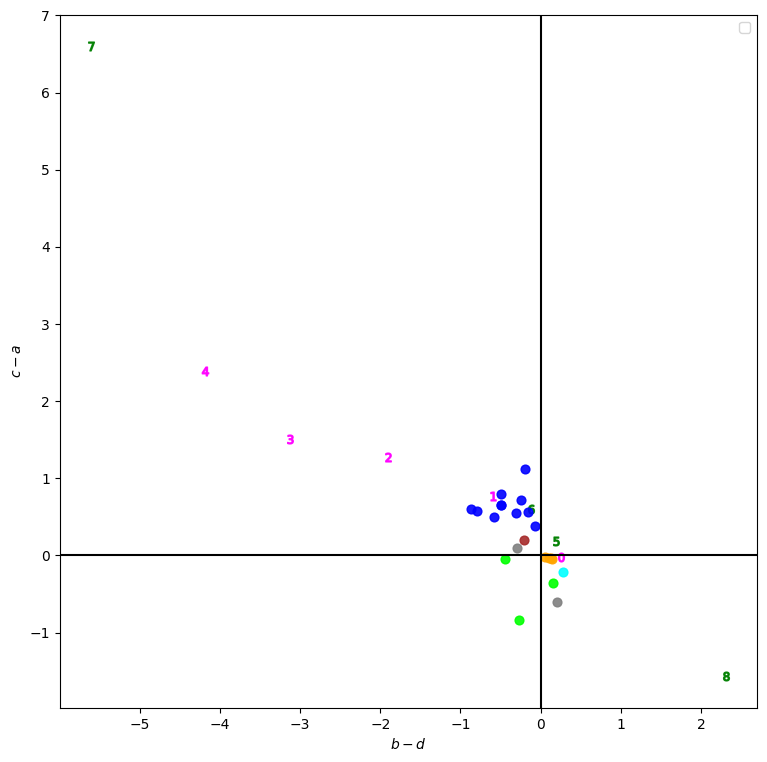

In [ ]:

fig, ax = plt.subplots(figsize=(9, 9))

for i in ID:
    row = df.query(f'index=={i}')
    plt.scatter(x=row["b-d"], y=row["c-a"],
                c=row["col_paper"], marker=f'{row["ID_markers"].to_string(index=False)}', alpha=0.9,s=40)
    #print(row["ID_markers"].to_string(index=False))

markers = [plt.Line2D([0,0],[0,0], marker='^', linestyle='') for ID in scott_df['ID']]
#sns.scatterplot(data=scott_df, x="b-d", y="c-a", col=scott_df["col_paper"], style=scott_df['Condition'], s=100)
#sns.move_legend(ax,bbox_to_anchor=(1, 1.02), loc='upper left')
#plt.legend(numpoints=1)

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set(xlabel=r"$b-d$", ylabel=r"$c-a$")


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in scott_dict.values()]

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#plt.legend(paper_dict.keys(), numpoints=1)
fig.savefig("Scott_ca_bd.png", dpi=200)


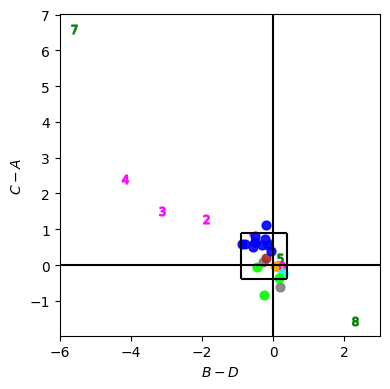

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))
for i in ID:
    row = df.query(f'index=={i}')
    plt.scatter(x=row["b-d"], y=row["c-a"],
                c=row["col_paper"], marker=f'{row["ID_markers"].to_string(index=False)}', alpha=0.9,s=40)
    #print(row["ID_markers"].to_string(index=False))
ax.axhline(0, c='black') ; ax.axvline(0,c='black')
ax.set(xlabel=r"$B-D$", ylabel=r"$C-A$")
plt.hlines(-0.4,xmin=-0.9,xmax=0.4, color='black')
plt.hlines(0.9,xmin=-0.9,xmax=0.4, color='black')
plt.vlines(-0.9,ymin=-0.4,ymax=0.9, color='black')
plt.vlines(0.4,ymin=-0.4,ymax=0.9, color='black')

#markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.xlim(-6,3)
#sns.move_legend(p, loc='upper right')
leg = plt.legend(markers, paper_dict.keys(), numpoints=1)
leg.get_frame().set_alpha(0)
leg.remove()
#plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
fig.savefig("Experimental_ca_bd.png", dpi=350)

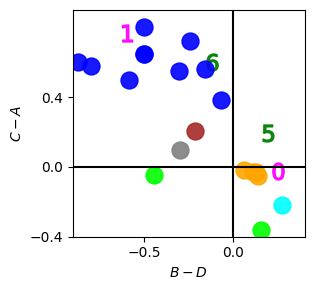

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
for i in ID:
    row = df.query(f'index=={i}')
    plt.scatter(x=row["b-d"], y=row["c-a"],
                c=row["col_paper"], marker=f'{row["ID_markers"].to_string(index=False)}', alpha=0.9,s=150)
    #print(row["ID_markers"].to_string(index=False))
ax.axhline(0, c='black') ; ax.axvline(0,c='black')
ax.set(xlabel=r"$B-D$", ylabel=r"$C-A$")


#markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]

#sns.move_legend(p, loc='upper right')
leg = plt.legend(markers, paper_dict.keys(), numpoints=1)
leg.get_frame().set_alpha(0)
leg.remove()
#plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plt.xlim(-0.9,0.4)
plt.yticks([-0.4,0,0.4])
plt.ylim(-0.4,0.9)
fig.savefig("Experimental_ca_bd_zoom.png", dpi=350)

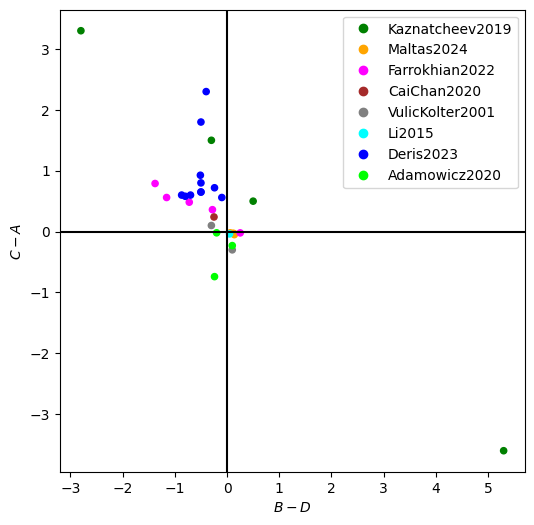

In [ ]:
df.plot.scatter(x="B-D", y="C-A", c="col_paper",figsize=(6, 6))
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$B-D$")
plt.ylabel(r"$C-A$")

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

plt.savefig("Experimental_CA_BD.png", dpi=500)


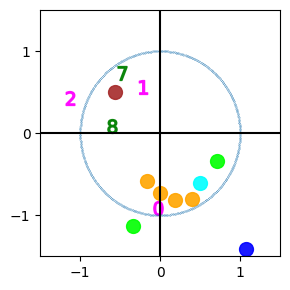

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))

for i in ID:
    row = df.query(f'index=={i}')
    plt.scatter(x=row["awm_s"], y=row["amw_s"],
                c=row["col_paper"], marker=f'{row["ID_markers"].to_string(index=False)}', alpha=0.9,s=100)

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set_xlabel('')#(r"$\alpha_{wms}$")#, fontsize=25)
ax.set_ylabel('')#(r"$\alpha_{mws}$")#,fontsize=25)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())


theta = np.linspace(0, 360, num=1000)
xcirc = np.sin(theta)
ycirc = np.cos(theta)
plt.scatter(xcirc, ycirc, label='circle', s=0.01)
plt.tight_layout()

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.xlim(-1.5,1.5)
plt.yticks([-1,0,1])
plt.xticks([-1,0,1])
plt.ylim(-1.5,1.5)

leg = plt.legend(markers, paper_dict.keys(), numpoints=1)
leg.remove()

fig.savefig("Experimental_awms_amws_nolegendzoom.png", dpi=350)

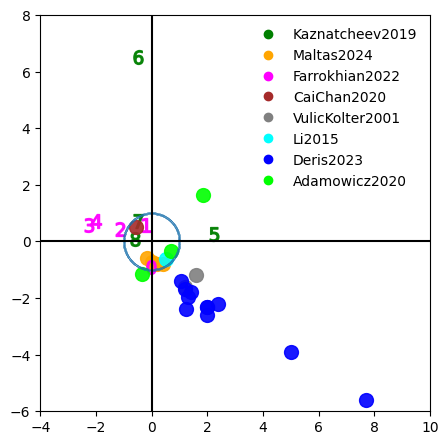

In [ ]:
df = df.query('paper != "Freischel2022"')
fig, ax = plt.subplots(figsize=(4.5, 4.5))

for i in range(len(ID)):
    row = df.query(f'index=={ID[i]}')
    plt.scatter(x=row["awm_s"], y=row["amw_s"],
                c=row["col_paper"], marker=lst[i], alpha=0.9,s=100)

ax.axhline(0, c='black') ; plt.axvline(0,c='black')
ax.set_xlabel('')#(r"$\alpha_{wms}$")#, fontsize=25)
ax.set_ylabel('')#(r"$\alpha_{mws}$")#,fontsize=25)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())


theta = np.linspace(0, 360, num=1000)
xcirc = np.sin(theta)
ycirc = np.cos(theta)
plt.scatter(xcirc, ycirc, label='circle', s=0.01)
plt.tight_layout()

plt.xlim(-4,10)
plt.ylim(-6,8)

leg = plt.legend(markers, paper_dict.keys(), numpoints=1)
leg.get_frame().set_alpha(0)

fig.savefig("Experimental_awms_amws_legend.png", dpi=350)

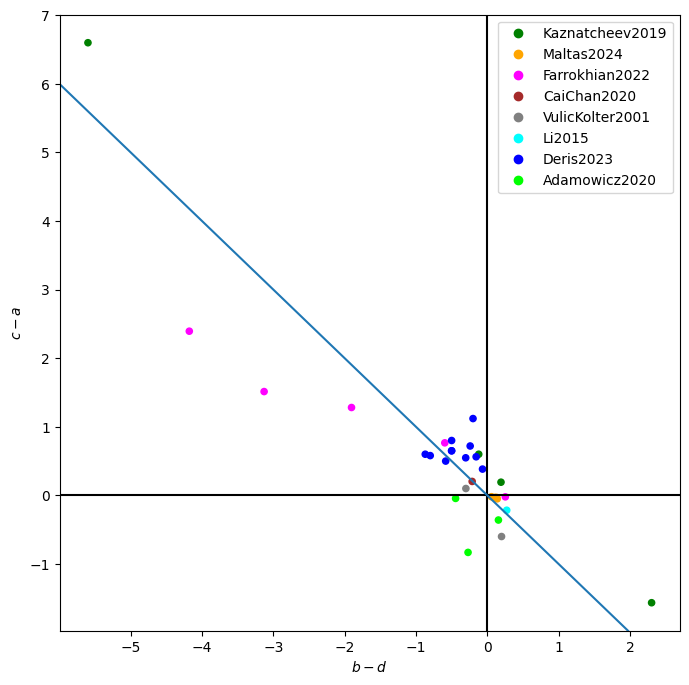

In [ ]:
df.plot.scatter(x="b-d", y="c-a", c="col_paper",figsize=(8, 8))
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$b-d$")
plt.ylabel(r"$c-a$")

plt.axline((0, 0), slope=-1)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

plt.savefig("Experimental_ca_bd.png", dpi=200)


In [ ]:
amw = np.linspace(-3, 3.2, 100) #a_mw
amw_mask = np.linspace(-4.5, 1.1, 100) #a_mw
awm_neg = np.linspace(-6, 3, 50) #a_mw
s_pos = np.linspace(0.01,3,50)
s_neg = np.linspace(-3,0.01,50)

# Mirroring
awm_mi = amw
amw_mi = -2*awm_mi/(awm_mi+1)

#Masking

#a_wm/s = a_mw/s + 2
awm = amw_mask + 2





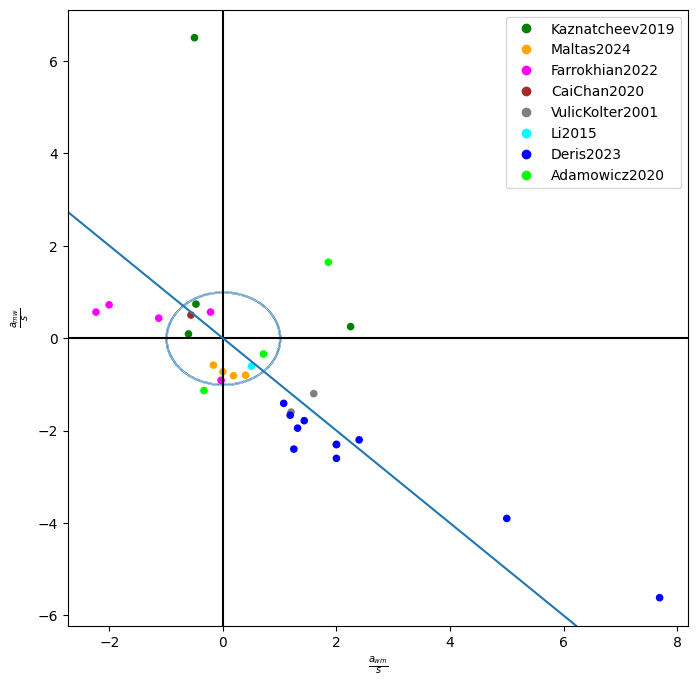

In [ ]:
df.plot.scatter(x="awm_s", y="amw_s", c="col_paper",figsize=(8, 8))
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$\frac{a_{wm}}{s}$")
plt.ylabel(r"$\frac{a_{mw}}{s}$")


theta = np.linspace(0, 360, num=1000)
xcirc = np.sin(theta)
ycirc = np.cos(theta)
plt.scatter(xcirc, ycirc, label='circle', s=0.01)

plt.axline((0, 0), slope=-1)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)
#plt.legend(by_label.values(), by_label.keys())

plt.savefig("Experimental_awms_amws.png", dpi=200)



In [ ]:
plt.close()

In [ ]:
mu=0.01
df['mask_awm']= df["a_mw"]+2*df['S']
df['mirror'] = df['S']*(2+df['S'])
df['maintain_awm']=df['a_mw']*mu/(df['S']*(1+df['S']))
df['maintain_awm']=-df['a_wm']*df['S']/(mu*(1+df['S']))

In [ ]:
df[["paper","A","B","C","D", "S","a_wm",'a_mw']].to_csv("paper_vals.csv")

awm_mt_s1

<Figure size 500x400 with 0 Axes>

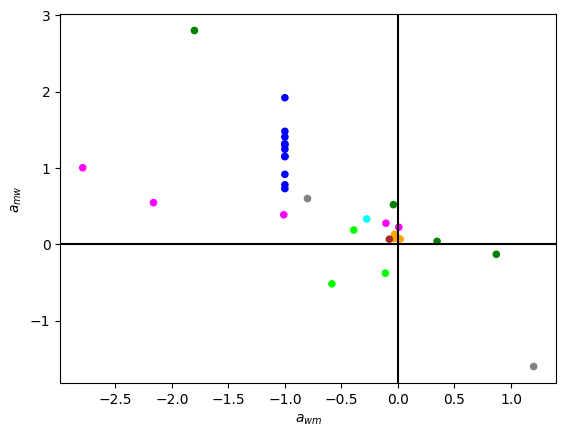

In [ ]:
x = np.linspace(-3, 3, 50)
#y = x -2*s5
#y2 = x + 2*s1

plt.figure(figsize=(5, 4))
df.plot.scatter(x="a_wm", y="a_mw", c="col_paper")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
#plt.plot(awm_mt_pos, amw, 'y', lw=2, label ='s>0')
#plt.plot(amw, awm_mt_neg, 'r', lw=2, label ='s<0')
#plt.plot(y2, x, 'b', lw=2, label ='s<0')
#plt.plot(awm_mimic[0:15], amw[0:15],'b',lw=2, label ='s<0')
#plt.plot(awm_mimic[20:50], amw[20:50],'b',lw=2, label ='s<0')

plt.xlabel(r"$a_{wm}$")
plt.ylabel(r"$a_{mw}$")
plt.savefig("Experimental.png")

#plt.legend()

## Shortest distance between points and surface

In [ ]:
# Distance
# Let the co-ordinate of the given point be (x1, y1, z1)
# and equation of the plane be given by the equation a * x + b * y + c * z + d = 0,

import math

# Function to find distance from a plane
def shortest_distance(x1, y1, z1, a, b, c, d):

    d = abs((a * x1 + b * y1 + c * z1 + d))
    e = (math.sqrt(a * a + b * b + c * c))
    print("Perpendicular distance is \n", d/e)
    return(d/e)


# Define the distance function to minimize
def distance_function(xyz, point):
    x, y, z = xyz
    x0, y0, z0 = point
    return ((x - x0)**2 + (y - y0)**2 + (z - z0)**2)

In [ ]:
from scipy.optimize import minimize
import numpy as np

### Maintenance
![image.png](attachment:b4778ea8-0647-4c5e-b411-6c0a56243fef.png)

In [ ]:
# Define the surface equation
def surface_equation(xyz):
    x, y, z = xyz
    if x>0:
      return  (mu*y/(x*(1+x)) - z) # Maintenance
    if x<0:
      return (-mu*z*(1+x)/x - y)

maint_dists = []
for i in df['S'].index:

    best_distance = float('inf')
    best_point = None

    x1 = df['S'][i]
    y1 = df['a_mw'][i]
    z1 = df['a_wm'][i]

    # Point coordinates
    point = (x1, y1, z1)

    x_guess = 2*np.random.random_sample(20)-1
    y_guess = 2*np.random.random_sample(20)-1
    z_guess = 2*np.random.random_sample(20)-1


    for initial_guess in zip(x_guess, y_guess, z_guess): # Initial guess for the optimizer
      initial_guess = np.array(initial_guess)

      # Constraint for the surface equation F(x, y, z) = 0
      surface_constraint = {'type': 'eq', 'fun': surface_equation}

      # Minimize the distance function subject to the surface constraint
      result = minimize(distance_function, initial_guess, args=(point,), constraints=surface_constraint)

      # The optimized point is the projection of the original point onto the surface
      closest_point_on_surface = result.x

      # Calculate the distance between the original point and its projection
      distance = np.sqrt(result.fun)
      if distance<best_distance:
        best_distance = distance
        best_point = closest_point_on_surface

    maint_dists.append(best_distance)

    print("Closest point on surface:", closest_point_on_surface)
    print("Distance to surface:", best_distance)

Closest point on surface: [0.14418615 0.05926523 0.00359235]
Distance to surface: 0.15262482539902295
Closest point on surface: [0.11252297 0.51352723 0.04102162]
Distance to surface: 0.08754433390562671
Closest point on surface: [3.80092623e+00 2.79969278e+00 1.53419087e-03]
Distance to surface: 1.801534236556815
Closest point on surface: [-1.43571573 -0.00264114  0.87023557]
Distance to surface: 0.12776249793999625
Closest point on surface: [-0.16115708 -0.00120585 -0.0231665 ]
Distance to surface: 0.13138790628233007
Closest point on surface: [-0.09977106 -0.00285295 -0.03161748]
Distance to surface: 0.08091610056920215
Closest point on surface: [-0.11911765  0.00189265  0.02558741]
Distance to surface: 0.06833908762147342
Closest point on surface: [-0.10846824  0.00053144  0.00646602]
Distance to surface: 0.07893403662208688
Closest point on surface: [-0.24493748  0.00044974  0.01458484]
Distance to surface: 0.22375648885915841
Closest point on surface: [0.49051992 0.27509213 0.003

### Masking
![image.png](attachment:3479b2c1-94bd-4b83-ad0e-72dcd7915ec0.png)

In [ ]:
#0=y+2x-z
# Plane
a = 2
b = +1
c = -1
d = 0

# Coord
x1 = df['S']
y1 = df['a_mw']
z1 = df['a_wm']

mask_dists = []

# Function call
for x,y,z in zip(x1,y1,z1):
  if x<0:
    mask_dist =shortest_distance(x,y,z, a, b, c, d) # same for both
  if x>0:
    mask_dist =shortest_distance(x,y,z, a, b, c, d) # same for both

  mask_dists.append(mask_dist)

Perpendicular distance is 
 4.082482904640447e-05
Perpendicular distance is 
 0.2939387691339814
Perpendicular distance is 
 4.980629143659129
Perpendicular distance is 
 1.5797575847789644
Perpendicular distance is 
 0.06531972647421809
Perpendicular distance is 
 0.03172089216904216
Perpendicular distance is 
 0.07756717518813397
Perpendicular distance is 
 0.05658321305829142
Perpendicular distance is 
 0.1121049805613768
Perpendicular distance is 
 0.5559525219536887
Perpendicular distance is 
 1.3003116299564503
Perpendicular distance is 
 1.8956192871108553
Perpendicular distance is 
 2.6832935387318324
Perpendicular distance is 
 0.16329931618554522
Perpendicular distance is 
 0.32659863237109044
Perpendicular distance is 
 0.16954551502964232
Perpendicular distance is 
 0.199837538182061
Perpendicular distance is 
 0.3919183588453085
Perpendicular distance is 
 0.5388877434122992
Perpendicular distance is 
 0.6001249869818787
Perpendicular distance is 
 0.4422553730595028
Perpe

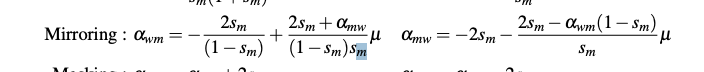

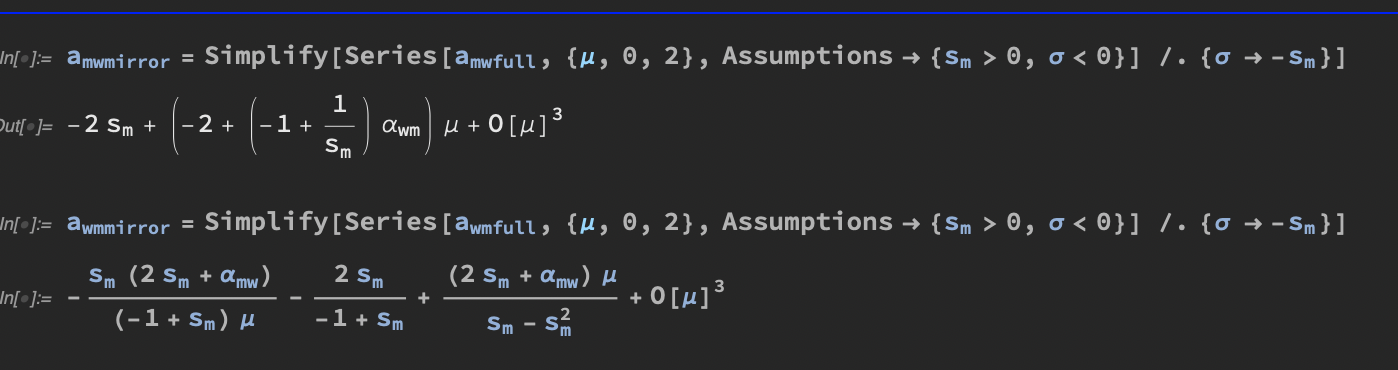



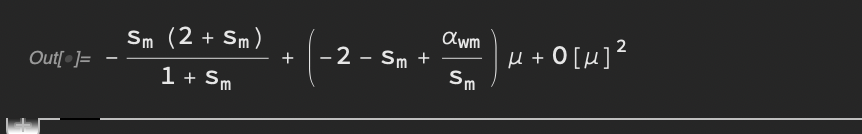

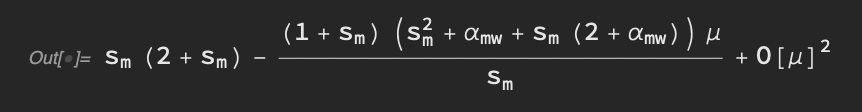

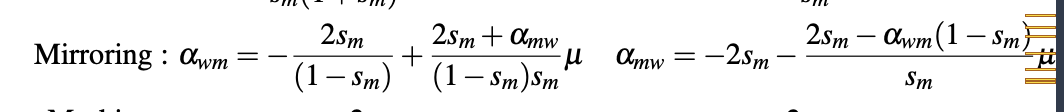

In [ ]:
mu = 0.001 # Define the surface equation
def surface_equation(xyz):
    x, y, z = xyz
    if x>0:
      return  (-(2*x)/(x-1) + mu*(2*x +z)/((x*(1-x))) -x*(2*x+z)/(mu*(x-1)) - y) # Mirror
    if x<0:
      return  (x*(2+x) - mu*((1+x)*(x*x + y + x*(2+y)))/x -z) # Mirror (EDIT)

def surface_equation_mu0(xyz):
    x, y, z = xyz
    if x>0:
      return  (-(2*x) - y) # Mirror
    if x<0:
      return  (x*(2+x) -z) # Mirror





mirror_dists = []
for i in df['S'].index:
    x1 = df['S'][i]
    y1 = df['a_mw'][i]
    z1 = df['a_wm'][i]

    # Point coordinates
    point = (x1, y1, z1)
    best_distance = float('inf')
    best_point = None

    x_guess = 2*np.random.random_sample(20)-1
    y_guess = 2*np.random.random_sample(20)-1
    z_guess = 2*np.random.random_sample(20)-1

    if df['Paper'][i]!="Adamowicz2020":
        # Constraint for the surface equation F(x, y, z) = 0
      surface_constraint = {'type': 'eq', 'fun': surface_equation}
    else:
      surface_constraint = {'type': 'eq', 'fun': surface_equation_mu0}

    for initial_guess in zip(x_guess, y_guess, z_guess): # Initial guess for the optimizer
      initial_guess = np.array(initial_guess)

      # Minimize the distance function subject to the surface constraint
      result = minimize(distance_function, initial_guess, args=(point,), constraints=surface_constraint)

      # The optimized point is the projection of the original point onto the surface
      closest_point_on_surface = result.x

      # Calculate the distance between the original point and its projection
      distance = np.sqrt(result.fun)

      if distance < best_distance:
        best_distance = distance
        best_point = closest_point_on_surface

    mirror_dists.append(best_distance)

    #print("Closest point on surface:", closest_point_on_surface)
    print("Distance to surface:", best_distance)


Distance to surface: 0.15390983380579357
Distance to surface: 0.04833577039284977
Distance to surface: 2.595138621402434
Distance to surface: 0.8710768821803995
Distance to surface: 0.12843376351175098
Distance to surface: 0.06886482033990879
Distance to surface: 0.11507380613774418
Distance to surface: 0.09649891929877843
Distance to surface: 0.2209259579780705
Distance to surface: 0.390282699252892
Distance to surface: 0.348612780244356
Distance to surface: 0.10060976563583086
Distance to surface: 0.0017071625175232173
Distance to surface: 0.03547550108128612
Distance to surface: 1.6641658702978108
Distance to surface: 0.08755418108022388
Distance to surface: 0.33840136307185703
Distance to surface: 0.05219516063251093
Distance to surface: 0.0371760788436651
Distance to surface: 0.4400348398232251
Distance to surface: 0.23991082360172866
Distance to surface: 0.18740120969957466
Distance to surface: 0.023203063379552986
Distance to surface: 0.1874295567729672
Distance to surface: 0.18

In [ ]:
df['mask_dist']=mask_dists
df['maint_dist']=maint_dists
df['mirror_dist']=mirror_dists

df.loc[df['Paper']=="Adamowicz2020",'maint_dist']=np.inf


In [ ]:

df['closest_mirror'] = (df['mirror_dist']<df['mask_dist']) &(df['mirror_dist']<df['maint_dist'] )
df['closest_mask'] = (df['mirror_dist']>df['mask_dist']) &(df['mask_dist']<df['maint_dist'] )
df['closest_maintain'] = (df['mirror_dist']>df['maint_dist']) &(df['mask_dist']>df['maint_dist'] )

In [ ]:
df.query("closest_mirror==True")[['Paper','mirror_dist','S','Ap','Bp','Cp','Dp']]

#df.query("closest_mirror==True")[['Paper','mirror_dist','S', 'a_mw', 'a_wm', 'dmi_s']]

,Paper,mirror_dist,S,Ap,Bp,Cp,Dp
1,Kaznatcheev2019,0.048336,0.0800,1.0,0.9600,1.6000,1.0800
10,Farrokhian2022,0.348613,0.8939,1.0,-0.0100,2.2812,1.8939
11,Farrokhian2022,0.100610,0.9676,1.0,-1.1622,2.5135,1.9676
12,Farrokhian2022,0.001707,1.3909,1.0,-1.7879,3.3939,2.3909
13,VulicKolter2001,0.035476,-0.5000,1.0,0.2000,1.1000,0.5000
18,Deris2023,0.052195,-0.7600,1.0,0.0000,1.7200,0.2400
19,Deris2023,0.037176,-0.8000,1.0,0.0000,2.1200,0.2000
20,Deris2023,0.440035,-0.1300,1.0,0.0000,1.6000,0.8700
21,Deris2023,0.239911,-0.4167,1.0,0.0000,1.5000,0.5833
22,Deris2023,0.187401,-0.5000,1.0,0.0000,1.6500,0.5000


In [ ]:
df['dmt_s']=df['maint_dist']/abs(df['S'])
df['dma_s']=df['mask_dist']/abs(df['S'])
df['dmi_s']=df['mirror_dist']/abs(df['S'])

df

,Lab,Paper,Condition,A,B,C,D,Ap,Bp,Cp,...,maintain_awm,mask_dist,maint_dist,mirror_dist,closest_mirror,closest_mask,closest_maintain,dmt_s,dma_s,dmi_s
0,Scott,Kaznatcheev2019,DMSO+CAF,2.6000,3.5000,3.10000,3.0000,1.0,1.3462,1.1923,...,-4.614800,0.000041,0.152625,0.153910,False,True,False,0.992359,0.000265,1.000714
1,Scott,Kaznatcheev2019,DMSO,2.5000,2.4000,4.00000,2.7000,1.0,0.9600,1.6000,...,0.296296,0.293939,0.087544,0.048336,True,False,False,1.094304,3.674235,0.604197
2,Scott,Kaznatcheev2019,Alectinib+CAF,0.5000,-0.4000,3.80000,2.4000,1.0,-0.8000,7.6000,...,142.500000,4.980629,1.801534,2.595139,False,False,True,0.474088,1.310692,0.682931
3,Scott,Kaznatcheev2019,Alectinib,2.3000,4.3000,-1.30000,-1.0000,1.0,1.8696,-0.5652,...,-286.960000,1.579758,0.127762,0.871077,False,False,True,0.089046,1.101030,0.607107
4,Scott,Maltas2023,PC9vEvolved,1.0000,0.9700,0.97000,0.8400,1.0,0.9700,0.9700,...,-0.571429,0.065320,0.131388,0.128434,False,True,False,0.821174,0.408248,0.802711
5,Scott,Maltas2023,PC9vKRAS,1.0300,0.9900,1.01000,0.9300,1.0,0.9612,0.9806,...,-0.417264,0.031721,0.080916,0.068865,False,True,False,0.833328,0.326683,0.709215
6,Scott,Maltas2023,PC9vPIK3CA,1.0000,1.0200,0.95000,0.8800,1.0,1.0200,0.9500,...,0.272727,0.077567,0.068339,0.115074,False,False,True,0.569492,0.646393,0.958948
7,Scott,Maltas2023,PC9vBRAF,1.0100,1.0100,0.98000,0.9000,1.0,1.0000,0.9703,...,0.000000,0.056583,0.078934,0.096499,False,True,False,0.724830,0.519589,0.886124
8,Scott,Farrokhian2022,Parental v Res,0.9963,1.0040,0.97500,0.7517,1.0,1.0077,0.9786,...,0.250543,0.112105,0.223756,0.220926,False,True,False,0.911432,0.456639,0.899902
9,Scott,Farrokhian2022,PvR 0.25um,0.4700,0.4200,0.83000,0.7000,1.0,0.8936,1.7660,...,3.496184,0.555953,0.110178,0.390283,False,False,True,0.225130,1.135988,0.797472


In [ ]:
df.query("closest_maintain==True")[['Paper','S','dmi_s','dma_s','dmt_s','Ap','Bp','Cp','Dp']]

,Paper,S,dmi_s,dma_s,dmt_s,Ap,Bp,Cp,Dp
1,Kaznatcheev2019,0.0800,1.281530,3.674235,1.094304,1.0,0.9600,1.6000,1.0800
2,Kaznatcheev2019,3.8000,0.999831,1.310692,0.474088,1.0,-0.8000,7.6000,4.8000
3,Kaznatcheev2019,-1.4348,0.607107,1.101030,0.089046,1.0,1.8696,-0.5652,-0.4348
6,Maltas2023,-0.1200,0.958947,0.646393,0.569492,1.0,1.0200,0.9500,0.8800
9,Farrokhian2022,0.4894,0.999214,1.135988,0.225130,1.0,0.8936,1.7660,1.4894
15,CaiChan2020,0.1356,0.991965,1.250336,0.593579,1.0,0.9237,1.2034,1.1356


In [ ]:
import scipy as sp

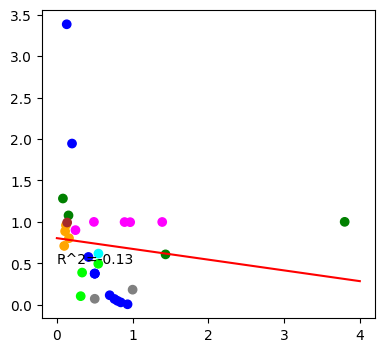

In [ ]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.axes()

df_filt = df#.query('closest_mirror')

#Mirror
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mirror_dist'])/abs(np.array(df_filt['S'])), c=df_filt['col_paper'], label='mirror', )
#Regression

# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 4, num=100)


xp=abs(np.array(df_filt['S']))
yp=np.array(df_filt['mirror_dist'])/abs(np.array(df_filt['S']))
linreg = sp.stats.linregress(xp,yp)
#The regression line can then be added to your plot: -

x=np.linspace(0,4,12)
plt.plot(x, linreg.intercept + linreg.slope*x, 'r')
#Similarly the r-squared value: -

plt.text(0, 0.5, f'R^2={np.round(linreg.rvalue,2)}')

#plt.xscale('log')
#plt.yscale('log')
plt.savefig("Mirror_regression.png")

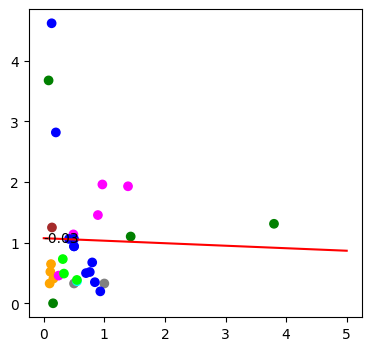

In [ ]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.axes()

df_filt = df#.query('closest_mask')

#Mirror
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mask_dist'])/abs(np.array(df_filt['S'])), c=df_filt['col_paper'], label='mask', )
#Regression

# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 4, num=100)

#plt.xscale('log')
#plt.yscale('log')

import scipy as sp
xp=abs(np.array(df_filt['S']))
yp=np.array(df_filt['mask_dist'])/abs(np.array(df_filt['S']))
linreg = sp.stats.linregress(xp,yp)
#The regression line can then be added to your plot: -

x=np.linspace(0,5,10)
plt.plot(x, linreg.intercept + linreg.slope*x, 'r')
#Similarly the r-squared value: -

plt.text(0, 1, np.round(linreg.rvalue,2))

plt.savefig("Mask_regression.png")

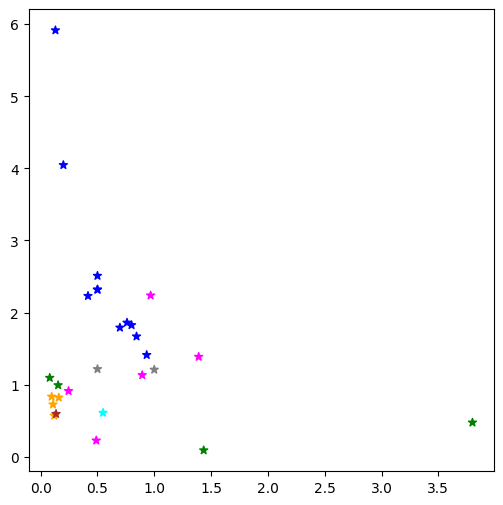

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

#Maintain
plt.scatter(abs(np.array(df['S'])), np.array(df['maint_dist'])/abs(np.array(df['S'])), c=df['col_paper'],marker='*', label='maintain')

#plt.scatter(xcirc, -ycirc, label='circle', s=0.2)
#Regression
b, a = np.polyfit(abs(np.array(df['S'])), np.array(df['maint_dist']), deg=1)

# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 4, num=50)

#plt.xlim(-4,4)
#plt.ylim(-4,4)
#plt.yscale('log')
# Plot regression line
#plt.plot(xseq, a + b * xseq, color="k", lw=2.5);
plt.savefig("Maintain_regression.png", dpi=300)



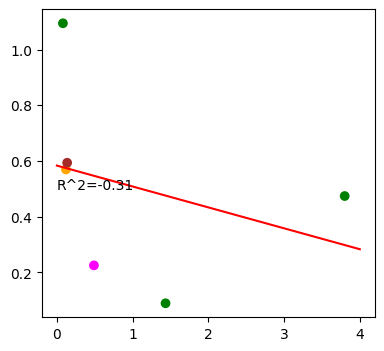

In [ ]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.axes()

df_filt = df.query('closest_maintain')

#Mirror
plt.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['maint_dist'])/abs(np.array(df_filt['S'])), c=df_filt['col_paper'], label='mirror', )
#Regression

# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 4, num=100)

xp=abs(np.array(df_filt['S']))
yp=np.array(df_filt['maint_dist'])/abs(np.array(df_filt['S']))
linreg = sp.stats.linregress(xp,yp)
#The regression line can then be added to your plot: -

x=np.linspace(0,4,12)
plt.plot(x, linreg.intercept + linreg.slope*x, 'r')
#Similarly the r-squared value: -

plt.text(0, 0.5, f'R^2={np.round(linreg.rvalue,2)}')

#plt.xscale('log')
#plt.yscale('log')
plt.savefig("Main_regression.png")



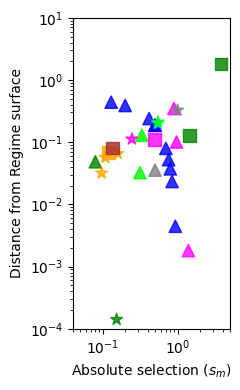

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(2.5,4))


#Mirror
df_filt = df.query('closest_mirror')
ax.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mirror_dist']+0.0001),
            c=df_filt['col_paper'],s=80, marker='^', label='mirror',alpha=0.8)
df_filt = df.query('closest_mask')
ax.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['mask_dist']+0.0001),
            c=df_filt['col_paper'],s=80, marker='*', label='mask',alpha=0.8)
df_filt = df.query('closest_maintain')
ax.scatter(abs(np.array(df_filt['S'])), np.array(df_filt['maint_dist']+0.0001),
            c=df_filt['col_paper'],s=80, marker='s', label='maintain',alpha=0.8)

l="Regime"
ax.set_xlabel("Absolute selection $(s_m)$")
ax.set_ylabel(f"Distance from {l} surface")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-4,1e1)
ax.set_xlim(4e-2,5e0)
  #a.legend(loc=4).get_frame().set_alpha(0)


#legend1 = plt.legend(loc=4)
#legend1.get_frame().set_alpha(0)

#legend2 = plt.legend(markers, paper_dict.keys(), numpoints=1, title='Papers')
#ax.add_artist(legend1)
#plt.hlines(y=1, xmin=0.01, xmax=10)
#plt.ylim(-1,9)
#plt.xlim(0.05,10)
plt.tight_layout()
plt.savefig('experimental_dist.png',dpi=450)

     Lab            Paper      Condition    A     B     C     D   Ap      Bp  \
0  Scott  Kaznatcheev2019       DMSO+CAF  2.6  3.50  3.10  3.00  1.0  1.3462   
1  Scott  Kaznatcheev2019           DMSO  2.5  2.40  4.00  2.70  1.0  0.9600   
2  Scott  Kaznatcheev2019  Alectinib+CAF  0.5 -0.40  3.80  2.40  1.0 -0.8000   
3  Scott  Kaznatcheev2019      Alectinib  2.3  4.30 -1.30 -1.00  1.0  1.8696   
4  Scott       Maltas2023    PC9vEvolved  1.0  0.97  0.97  0.84  1.0  0.9700   

       Cp  ...  maintain_awm  mask_dist maint_dist  mirror_dist  \
0  1.1923  ...     -4.614800   0.000041   0.152625     0.153910   
1  1.6000  ...      0.296296   0.293939   0.087544     0.048336   
2  7.6000  ...    142.500000   4.980629   1.801534     2.595139   
3 -0.5652  ...   -286.960000   1.579758   0.127762     0.871077   
4  0.9700  ...     -0.571429   0.065320   0.131388     0.128434   

   closest_mirror  closest_mask  closest_maintain     dmt_s     dma_s  \
0           False          True            

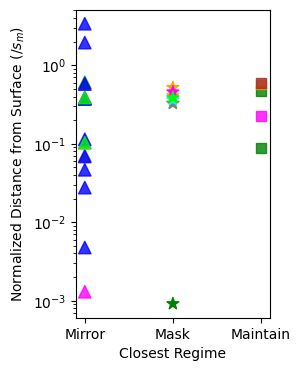

In [ ]:
fig = plt.figure(figsize=(2.5,4))
ax = plt.axes()

print(df.head())


#Mirror
df_filt = df.query('closest_mirror')
plt.scatter(list(repeat('Mirror',len(df_filt))), #abs(np.array(df_filt['S'])),
            np.array(df_filt['mirror_dist']+0.0001)/abs(np.array(df_filt['S'])),
            c=df_filt['col_paper'],s=80, marker='^', label='mirror',alpha=0.8)
df_filt = df.query('closest_mask')
plt.scatter(list(repeat('Mask',len(df_filt))), #abs(np.array(df_filt['S']))
            np.array(df_filt['mask_dist']+0.0001)/abs(np.array(df_filt['S'])),
            c=df_filt['col_paper'], marker='*', label='mask',
            s=80) #500*(max(np.array(df_filt['mask_dist']+0.0001)/abs(np.array(df_filt['S'])))-np.array(df_filt['mask_dist']+0.0001)/abs(np.array(df_filt['S']))))
df_filt = df.query('closest_maintain')
plt.scatter(list(repeat('Maintain',len(df_filt))),  #abs(np.array(df_filt['S'])),
            np.array(df_filt['maint_dist']+0.0001)/abs(np.array(df_filt['S'])),
            c=df_filt['col_paper'], s= 50,
            marker='s', label='maintain',alpha=0.8)
plt.xlabel("Closest Regime")
plt.ylabel("Normalized Distance from Surface (/$s_m$)")
#plt.xscale('log')
plt.yscale('log')
#legend1 = plt.legend(loc=1)
#legend1.get_frame().set_alpha(0)

#legend2 = plt.legend(markers, paper_dict.keys(), numpoints=1, title='Papers')
#ax.add_artist(legend1)
#plt.hlines(y=1, xmin=0.01, xmax=10)
#plt.ylim(-1,9)
#plt.xlim(0.05,10)

plt.savefig('experimental_dist.png',dpi=350)